# Convert Dicom images and masks to point clouds


In [1]:
import pylidc as pl
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
import csv

## From annotations generate binary masks
## Sample points on tumour surface


In [2]:
# set working directory
workdir = "/home/qw817/Desktop/Lung_TDA_application"
import os
import sys
os.chdir(workdir)
sys.path.insert(0, os.path.join(workdir, "Functions"))
# Handling arrays
import numpy as np

# Handling dicom images
import SimpleITK as sitk

# Persistent homology and topological feature extraction
import TDAfeatures as tf
from ripser import ripser
from persim import plot_diagrams

In [3]:
df = pd.read_excel('Diagnosis.xls') 
diagnosis = np.asarray(df) 

In [32]:
ids = []
sizes = []
num = 0
all_masks = []
all_pc =[]
for i in diagnosis[:,0]: # skipped 0178 due to bad annotation
    if i not in ['LIDC-IDRI-0178','LIDC-IDRI-0200','LIDC-IDRI-0247']:
        # if annotation available generate binary masks and point clouds
        if len(pl.query(pl.Scan).filter(pl.Scan.patient_id == i).first().annotations)!=0:
            # identify annotation
            ann = pl.query(pl.Annotation).join(pl.Scan)\
                    .filter(pl.Scan.patient_id == i).first()
            # binary mask
            mask = ann.boolean_mask()
            all_masks.append(mask)
            # concate mask into one large matrix
            test1 = np.concatenate([mask[:,:,j] for j in range(mask.shape[2])], axis=0)
            # save np array as csv
            np.savetxt("masks/"+i+"_mask.csv", test1, delimiter=",")
            # save id
            ids.append(i)
            # save mask shape
            sizes.append(mask.shape)

            # generate pc
            vol = tf.read_dcm("dcm/"+i[-4:])
            verts, faces = tf.mesh_from_lesion(vol, mask)
            all_pc.append(verts)
            # save point clouds
            np.savetxt("point_clouds/"+i+"_pc.csv", verts, delimiter = ",")

            num +=1
            if num%10==0:
                print(num)
print(num)

10
20
30
40
50
60
70
80
90
100
110
120
130
139


## 139 in total

for i in ids:
    print("/home/qw817/rivet/rivet_console /home/qw817/Desktop/Lung_TDA_application/point_clouds/"+i+"_pc.csv /home/qw817/Desktop/Lung_TDA_application/rivet_outputs/rivet"+i[-4:]+".rivet --datatype points --homology 0 --xbins 20 --ybins 20")


In [42]:
# printed to the terminal 
# only for point cloud - default degree rips


In [53]:
[i.shape for i in all_pc]

[(989, 3),
 (6188, 3),
 (185, 3),
 (197, 3),
 (317, 3),
 (94, 3),
 (32, 3),
 (114, 3),
 (94, 3),
 (1309, 3),
 (3092, 3),
 (107, 3),
 (659, 3),
 (369, 3),
 (404, 3),
 (1782, 3),
 (888, 3),
 (117, 3),
 (5059, 3),
 (64, 3),
 (185, 3),
 (139, 3),
 (128, 3),
 (116, 3),
 (348, 3),
 (420, 3),
 (879, 3),
 (109, 3),
 (879, 3),
 (505, 3),
 (177, 3),
 (195, 3),
 (65, 3),
 (1937, 3),
 (1647, 3),
 (2348, 3),
 (1149, 3),
 (1666, 3),
 (488, 3),
 (212, 3),
 (928, 3),
 (69, 3),
 (90, 3),
 (112, 3),
 (1286, 3),
 (143, 3),
 (3312, 3),
 (43, 3),
 (225, 3),
 (463, 3),
 (1961, 3),
 (2368, 3),
 (136, 3),
 (2486, 3),
 (142, 3),
 (54, 3),
 (63, 3),
 (63, 3),
 (208, 3),
 (286, 3),
 (239, 3),
 (368, 3),
 (2236, 3),
 (66, 3),
 (1031, 3),
 (71, 3),
 (204, 3),
 (56, 3),
 (405, 3),
 (570, 3),
 (272, 3),
 (1739, 3),
 (199, 3),
 (82, 3),
 (124, 3),
 (667, 3),
 (173, 3),
 (881, 3),
 (455, 3),
 (2096, 3),
 (5947, 3),
 (87, 3),
 (29, 3),
 (130, 3),
 (92, 3),
 (63, 3),
 (162, 3),
 (328, 3),
 (43, 3),
 (270, 3),
 (472, 3),

In [51]:
# subsample for point clouds larger than 1000
small_pc =[]
for i in range(len(ids)):
    current = all_pc[i]
    if current.shape[0]>1000:
        # randomly shuffle data
        np.random.shuffle(current)
        current = current[:1000,:]
        small_pc.append(current)
    else:
        small_pc.append(current)
    np.savetxt("small_point_clouds/pc_"+ids[i][-4:]+".txt", current, delimiter=',')

    


In [52]:
for i in ids:
    print("/home/qw817/rivet/rivet_console /home/qw817/Desktop/Lung_TDA_application/small_point_clouds/pc_"+i[-4:]+".txt /home/qw817/Desktop/Lung_TDA_application/rivet_outputs/rivet"+i[-4:]+".rivet --datatype points --homology 0 --xbins 20 --ybins 20")

/home/qw817/rivet/rivet_console /home/qw817/Desktop/Lung_TDA_application/small_point_clouds/pc_0068.txt /home/qw817/Desktop/Lung_TDA_application/rivet_outputs/rivet0068.rivet --datatype points --homology 0 --xbins 20 --ybins 20
/home/qw817/rivet/rivet_console /home/qw817/Desktop/Lung_TDA_application/small_point_clouds/pc_0072.txt /home/qw817/Desktop/Lung_TDA_application/rivet_outputs/rivet0072.rivet --datatype points --homology 0 --xbins 20 --ybins 20
/home/qw817/rivet/rivet_console /home/qw817/Desktop/Lung_TDA_application/small_point_clouds/pc_0088.txt /home/qw817/Desktop/Lung_TDA_application/rivet_outputs/rivet0088.rivet --datatype points --homology 0 --xbins 20 --ybins 20
/home/qw817/rivet/rivet_console /home/qw817/Desktop/Lung_TDA_application/small_point_clouds/pc_0090.txt /home/qw817/Desktop/Lung_TDA_application/rivet_outputs/rivet0090.rivet --datatype points --homology 0 --xbins 20 --ybins 20
/home/qw817/rivet/rivet_console /home/qw817/Desktop/Lung_TDA_application/small_point_clo

In [54]:
[i.shape for i in small_pc]

[(989, 3),
 (1000, 3),
 (185, 3),
 (197, 3),
 (317, 3),
 (94, 3),
 (32, 3),
 (114, 3),
 (94, 3),
 (1000, 3),
 (1000, 3),
 (107, 3),
 (659, 3),
 (369, 3),
 (404, 3),
 (1000, 3),
 (888, 3),
 (117, 3),
 (1000, 3),
 (64, 3),
 (185, 3),
 (139, 3),
 (128, 3),
 (116, 3),
 (348, 3),
 (420, 3),
 (879, 3),
 (109, 3),
 (879, 3),
 (505, 3),
 (177, 3),
 (195, 3),
 (65, 3),
 (1000, 3),
 (1000, 3),
 (1000, 3),
 (1000, 3),
 (1000, 3),
 (488, 3),
 (212, 3),
 (928, 3),
 (69, 3),
 (90, 3),
 (112, 3),
 (1000, 3),
 (143, 3),
 (1000, 3),
 (43, 3),
 (225, 3),
 (463, 3),
 (1000, 3),
 (1000, 3),
 (136, 3),
 (1000, 3),
 (142, 3),
 (54, 3),
 (63, 3),
 (63, 3),
 (208, 3),
 (286, 3),
 (239, 3),
 (368, 3),
 (1000, 3),
 (66, 3),
 (1000, 3),
 (71, 3),
 (204, 3),
 (56, 3),
 (405, 3),
 (570, 3),
 (272, 3),
 (1000, 3),
 (199, 3),
 (82, 3),
 (124, 3),
 (667, 3),
 (173, 3),
 (881, 3),
 (455, 3),
 (1000, 3),
 (1000, 3),
 (87, 3),
 (29, 3),
 (130, 3),
 (92, 3),
 (63, 3),
 (162, 3),
 (328, 3),
 (43, 3),
 (270, 3),
 (472, 3),

## Convert rivet outputs into rank functions


In [56]:
from rank import rank_function

In [57]:
with open("rivet_outputs/rivet0068.rivet", 'rb') as f:
    computed_data = f.read()
r1 = rank_function(computed_data, grid_size=20, fixed_bounds=None, use_weights=False, normalize=False, minimum_rank=0)

In [59]:
sum(r1)

9319.0

In [61]:
sum(r1==0)

34781

In [63]:
all_ranks = []
for i in ids:
    with open("rivet_outputs/rivet"+i[-4:]+".rivet", 'rb') as f:
        computed_data = f.read()
    current_rank = rank_function(computed_data, grid_size=20, fixed_bounds=None, use_weights=False, normalize=False, minimum_rank=0)
    all_ranks.append(current_rank)

In [64]:
np.savetxt("computed_rank_functions_degree_rips.csv", np.array(all_ranks), delimiter=',')

In [65]:
rank_mat = np.array(all_ranks)
rank_mat.shape

(139, 44100)

In [76]:
diagnosis.shape

(157, 14)

In [77]:
indices = []
for i in range(157):
    if diagnosis[i,0] in ids:
        indices.append(i)

In [78]:
len(indices)

139

In [79]:
useful_diagnosis = diagnosis[indices,:]

In [81]:
useful_diagnosis[:,0]==ids

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [82]:
useful_diagnosis[:,1]==0 #unknown diagnosis

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False,  True, False, False, False,
       False, False, False,  True,  True, False,  True,  True, False,
        True,  True,  True, False, False,  True, False, False, False,
        True, False,  True, False,  True, False, False,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True,  True,  True,  True, False, False, False,  True,
        True, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
        True, False,

In [83]:
sum(useful_diagnosis[:,1]==0 ) #24 unknown level

24

In [86]:
useful_diagnosis[useful_diagnosis[:,1]!=0,:].shape

(115, 14)

In [87]:
diagnosed = useful_diagnosis[useful_diagnosis[:,1]!=0,:]

In [89]:
# diagnosed contains those with diagnosed level
# 1 is benign
# 2,3 malignant
diagnosed_ranks = rank_mat[useful_diagnosis[:,1]!=0,:]

In [94]:
# make labels
#let 1 be benign and 0 be malignant
labels = np.array([0 for i in range(115)])
labels[diagnosed[:,1]==1]=1

In [95]:
sum(labels)

29

In [96]:
sum(diagnosed[:,1]==1)

29

In [102]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import accuracy_score,average_precision_score

X_train, X_test, y_train, y_test = train_test_split(diagnosed_ranks, labels, test_size=0.2)
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

train_pred = knn_model.predict(X_train)
train_acc = accuracy_score(y_train, np.array([round(i) for i in train_pred]))
print(train_acc)
test_pred = knn_model.predict(X_test)
test_acc = accuracy_score(y_test, np.array([round(i) for i in test_pred]))
print(test_acc)

0.7608695652173914
0.9130434782608695


In [103]:
# define a function for computing the accuracy over 
def cv_accuracy_iter(X, y, n_iter=10, fold=5):
    overall_acc = [1000 for j in range(n_iter)]
    for i in range(n_iter):
        accuracies = [100 for k in range(fold)]
        # fold cv
        str_cv = StratifiedKFold(n_splits=fold, shuffle=True)
        fold_num = 0
        for train_index, test_index in str_cv.split(X, y):
            knn_model = KNeighborsRegressor(n_neighbors=5)
            knn_model.fit(X[train_index], y[train_index])
            test_pred = knn_model.predict(X[test_index])
            test_acc = accuracy_score(y[test_index], np.array([round(i) for i in test_pred]))
            accuracies[fold_num] = test_acc
            # update fold
            fold_num +=1
        overall_acc[i] = np.mean(accuracies)
        print(accuracies)
    return overall_acc

from sklearn.model_selection import StratifiedKFold
cv_accuracy_iter(diagnosed_ranks, labels, 10, 5)

[0.8695652173913043, 0.7391304347826086, 0.6521739130434783, 0.6521739130434783, 0.6956521739130435]
[0.8695652173913043, 0.6956521739130435, 0.7391304347826086, 0.6956521739130435, 0.6086956521739131]
[0.7391304347826086, 0.6086956521739131, 0.6956521739130435, 0.782608695652174, 0.7391304347826086]
[0.6521739130434783, 0.782608695652174, 0.7391304347826086, 0.6956521739130435, 0.6956521739130435]
[0.7391304347826086, 0.6521739130434783, 0.6086956521739131, 0.6956521739130435, 0.8260869565217391]
[0.6956521739130435, 0.8260869565217391, 0.6086956521739131, 0.7391304347826086, 0.782608695652174]
[0.6521739130434783, 0.6956521739130435, 0.6956521739130435, 0.6521739130434783, 0.7391304347826086]
[0.7391304347826086, 0.7391304347826086, 0.7391304347826086, 0.6956521739130435, 0.7391304347826086]
[0.6521739130434783, 0.6956521739130435, 0.7391304347826086, 0.782608695652174, 0.6086956521739131]
[0.782608695652174, 0.782608695652174, 0.7391304347826086, 0.782608695652174, 0.739130434782608

[0.7217391304347827,
 0.7217391304347825,
 0.7130434782608696,
 0.7130434782608696,
 0.7043478260869566,
 0.7304347826086957,
 0.6869565217391305,
 0.7304347826086957,
 0.6956521739130435,
 0.7652173913043478]

In [107]:
# define a function for computing the average precision 
def cv_ap_iter(X, y, n_iter=10, fold=5):
    overall_ap = [1000 for j in range(n_iter)]
    for i in range(n_iter):
        ap = [100 for k in range(fold)]
        # fold cv
        str_cv = StratifiedKFold(n_splits=fold, shuffle=True)
        fold_num = 0
        for train_index, test_index in str_cv.split(X, y):
            knn_model = KNeighborsRegressor(n_neighbors=5)
            knn_model.fit(X[train_index], y[train_index])
            test_pred = knn_model.predict(X[test_index])
            test_ap = average_precision_score(y[test_index], test_pred)
            ap[fold_num] = test_ap
            # update fold
            fold_num +=1
        overall_ap[i] = np.mean(ap)
        print(ap)
    return overall_ap

cv_ap_iter(diagnosed_ranks, labels, 10, 5)

[0.5331103678929766, 0.3270358868184956, 0.24154589371980675, 0.26679841897233203, 0.2077898550724638]
[0.19891304347826086, 0.28043478260869564, 0.4601449275362318, 0.3234126984126984, 0.4]
[0.18968379446640315, 0.39806763285024155, 0.4304347826086956, 0.2911490683229814, 0.23140096618357486]
[0.4773934837092732, 0.2772601794340925, 0.5879227053140097, 0.3081841432225064, 0.22038740245261987]
[0.26923583662714096, 0.2526167471819646, 0.3863871635610766, 0.3536231884057971, 0.2503019323671498]
[0.21739130434782608, 0.40458937198067635, 0.31175311467073485, 0.31431159420289856, 0.279549114331723]
[0.19528985507246377, 0.33448355187485623, 0.37984189723320155, 0.2851966873706004, 0.3341645353793692]
[0.3022501906941266, 0.4309782608695652, 0.3883712905452036, 0.23642861827005052, 0.2573671497584541]
[0.20695652173913046, 0.469047619047619, 0.5262681159420289, 0.442512077294686, 0.27904040404040403]
[0.19453734671125975, 0.4722222222222222, 0.3048245614035088, 0.42028985507246375, 0.37399

[0.3152560844952149,
 0.33258109040717737,
 0.3081472488863793,
 0.3742295828265004,
 0.3024329736286258,
 0.3055188999067718,
 0.3057953053860982,
 0.32307910202748,
 0.3847649476127737,
 0.3531735088371244]

In [111]:
from sklearn import svm
clf = svm.SVC()

X_train, X_test, y_train, y_test = train_test_split(diagnosed_ranks, labels, test_size=0.2)

clf.fit(X_train, y_train)

train_pred = clf.predict(X_train)
train_acc = accuracy_score(y_train, np.array([round(i) for i in train_pred]))
print(train_acc)
test_pred = clf.predict(X_test)
test_acc = accuracy_score(y_test, np.array([round(i) for i in test_pred]))
print(test_acc)

0.7717391304347826
0.6521739130434783


In [112]:
# define a function for computing the accuracy over 
def cv_accuracy_iter(X, y, n_iter=10, fold=5):
    overall_acc = [1000 for j in range(n_iter)]
    for i in range(n_iter):
        accuracies = [100 for k in range(fold)]
        # fold cv
        str_cv = StratifiedKFold(n_splits=fold, shuffle=True)
        fold_num = 0
        for train_index, test_index in str_cv.split(X, y):
            clf = svm.LinearSVC()
            clf.fit(X[train_index], y[train_index])
            test_pred = clf.predict(X[test_index])
            test_acc = accuracy_score(y[test_index], np.array([round(i) for i in test_pred]))
            accuracies[fold_num] = test_acc
            # update fold
            fold_num +=1
        overall_acc[i] = np.mean(accuracies)
        print(accuracies)
    return overall_acc

cv_accuracy_iter(diagnosed_ranks, labels, 10, 5)

/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[0.8695652173913043, 0.7391304347826086, 0.6086956521739131, 0.782608695652174, 0.782608695652174]


/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[0.782608695652174, 0.43478260869565216, 0.6956521739130435, 0.782608695652174, 0.7391304347826086]


/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[0.6086956521739131, 0.6521739130434783, 0.6521739130434783, 0.8260869565217391, 0.7391304347826086]


/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[0.34782608695652173, 0.6956521739130435, 0.782608695652174, 0.782608695652174, 0.5217391304347826]


/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[0.7391304347826086, 0.7391304347826086, 0.8695652173913043, 0.5217391304347826, 0.5652173913043478]


/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[0.6521739130434783, 0.6956521739130435, 0.6956521739130435, 0.782608695652174, 0.8260869565217391]


/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[0.782608695652174, 0.6956521739130435, 0.6521739130434783, 0.7391304347826086, 0.7391304347826086]


/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[0.5652173913043478, 0.6956521739130435, 0.7391304347826086, 0.6521739130434783, 0.8260869565217391]


/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[0.8695652173913043, 0.6521739130434783, 0.6521739130434783, 0.782608695652174, 0.6956521739130435]


/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[0.8260869565217391, 0.5652173913043478, 0.4782608695652174, 0.7391304347826086, 0.782608695652174]


/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[0.7565217391304347,
 0.6869565217391305,
 0.6956521739130436,
 0.6260869565217392,
 0.6869565217391304,
 0.7304347826086957,
 0.7217391304347824,
 0.6956521739130435,
 0.7304347826086957,
 0.6782608695652174]

In [114]:
# 3 classifications 3=meta 2=primary 1=benign
indices3 = useful_diagnosis[:,1]!=0
labels3 = useful_diagnosis[indices3,1]
ranks3 = rank_mat[indices3,:]

In [115]:
ranks3.shape

(115, 44100)

In [121]:
labels3_txt = ["B" for i in range(115)]
for i in range(115):
    if labels3[i]==2:
        labels3_txt[i]="P"
    elif labels3[i]==3:
        labels3_txt[i] = "M"
print(labels3_txt)

['M', 'P', 'M', 'P', 'M', 'M', 'M', 'M', 'M', 'M', 'P', 'B', 'M', 'M', 'B', 'P', 'M', 'M', 'P', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'B', 'P', 'B', 'M', 'M', 'P', 'M', 'M', 'M', 'M', 'P', 'M', 'M', 'P', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'P', 'M', 'B', 'P', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'P', 'M', 'P', 'B', 'B', 'P', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'P', 'P', 'P', 'P', 'P', 'P', 'B', 'B', 'P', 'P', 'P', 'B', 'P', 'P', 'B', 'P', 'P', 'P', 'P', 'B', 'P', 'P', 'M', 'P', 'P', 'M', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'P', 'M']


In [130]:
from sklearn.neighbors import KNeighborsClassifier
X_train, X_test, y_train, y_test = train_test_split(ranks3, labels3.astype('int'), test_size=0.2)
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

train_pred = knn_model.predict(X_train)
train_acc = accuracy_score(y_train, np.array([round(i) for i in train_pred]))
print(train_acc)
test_pred = knn_model.predict(X_test)
test_acc = accuracy_score(y_test, np.array([round(i) for i in test_pred]))
print(test_acc)

0.5760869565217391
0.4782608695652174


numpy.ndarray

In [131]:
# define a function for computing the accuracy over 
def cv_accuracy_iter(X, y, n_iter=10, fold=5):
    overall_acc = [1000 for j in range(n_iter)]
    for i in range(n_iter):
        accuracies = [100 for k in range(fold)]
        # fold cv
        str_cv = StratifiedKFold(n_splits=fold, shuffle=True)
        fold_num = 0
        for train_index, test_index in str_cv.split(X, y):
            knn_model = KNeighborsClassifier(n_neighbors=5)
            knn_model.fit(X[train_index], y[train_index])
            test_pred = knn_model.predict(X[test_index])
            test_acc = accuracy_score(y[test_index], np.array([round(i) for i in test_pred]))
            accuracies[fold_num] = test_acc
            # update fold
            fold_num +=1
        overall_acc[i] = np.mean(accuracies)
        print(accuracies)
    return overall_acc

from sklearn.model_selection import StratifiedKFold
cv_accuracy_iter(ranks3, labels3.astype('int'), 10, 5)

[0.5652173913043478, 0.2608695652173913, 0.34782608695652173, 0.4782608695652174, 0.391304347826087]
[0.4782608695652174, 0.34782608695652173, 0.5217391304347826, 0.5217391304347826, 0.5652173913043478]
[0.6521739130434783, 0.34782608695652173, 0.2608695652173913, 0.391304347826087, 0.5652173913043478]
[0.5217391304347826, 0.43478260869565216, 0.21739130434782608, 0.391304347826087, 0.5217391304347826]
[0.391304347826087, 0.43478260869565216, 0.43478260869565216, 0.4782608695652174, 0.391304347826087]
[0.43478260869565216, 0.30434782608695654, 0.5217391304347826, 0.4782608695652174, 0.391304347826087]
[0.43478260869565216, 0.30434782608695654, 0.43478260869565216, 0.6086956521739131, 0.391304347826087]
[0.6086956521739131, 0.391304347826087, 0.34782608695652173, 0.391304347826087, 0.6086956521739131]
[0.30434782608695654, 0.5217391304347826, 0.391304347826087, 0.43478260869565216, 0.391304347826087]
[0.34782608695652173, 0.391304347826087, 0.4782608695652174, 0.43478260869565216, 0.521

[0.408695652173913,
 0.4869565217391304,
 0.4434782608695652,
 0.41739130434782606,
 0.42608695652173917,
 0.42608695652173906,
 0.43478260869565216,
 0.4695652173913043,
 0.40869565217391307,
 0.43478260869565216]

In [132]:
from sklearn.decomposition import PCA
pca = PCA()
ranks3_pca = pca.fit_transform(ranks3)

In [133]:
ranks3_pca.shape

(115, 115)

In [134]:
cv_accuracy_iter(ranks3_pca, labels3.astype('int'), 10, 5)

[0.5652173913043478, 0.391304347826087, 0.43478260869565216, 0.391304347826087, 0.4782608695652174]
[0.6086956521739131, 0.30434782608695654, 0.43478260869565216, 0.43478260869565216, 0.4782608695652174]
[0.34782608695652173, 0.5217391304347826, 0.5652173913043478, 0.5217391304347826, 0.4782608695652174]
[0.391304347826087, 0.34782608695652173, 0.43478260869565216, 0.43478260869565216, 0.6086956521739131]
[0.391304347826087, 0.5217391304347826, 0.43478260869565216, 0.43478260869565216, 0.391304347826087]
[0.5652173913043478, 0.5217391304347826, 0.34782608695652173, 0.5652173913043478, 0.30434782608695654]
[0.4782608695652174, 0.391304347826087, 0.34782608695652173, 0.43478260869565216, 0.391304347826087]
[0.5217391304347826, 0.4782608695652174, 0.4782608695652174, 0.34782608695652173, 0.34782608695652173]
[0.5217391304347826, 0.2608695652173913, 0.5652173913043478, 0.34782608695652173, 0.391304347826087]
[0.43478260869565216, 0.4782608695652174, 0.34782608695652173, 0.391304347826087, 

[0.4521739130434782,
 0.4521739130434782,
 0.4869565217391304,
 0.4434782608695652,
 0.43478260869565216,
 0.4608695652173913,
 0.40869565217391307,
 0.43478260869565216,
 0.41739130434782606,
 0.4434782608695652]

In [135]:
# plot in 2d
pca = PCA(3)
ranks3_2 = pca.fit_transform(ranks3)

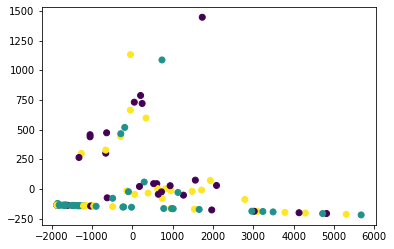

In [139]:
plt.scatter(ranks3_2[:,0], ranks3_2[:,1],c=labels3)

### write small_pc to txt file with height [:,2] as extra filtration function

In [140]:
#test
trial = small_pc[0]
trial.shape

(989, 3)

## 'w' overwrites
## 'a' append
## 'x' create new file if it does not exist

In [151]:
#
f = open("trial_write.txt", "w")
f.write("--datatype points_fn\n")
f.close()

In [152]:
f = open("trial_write.txt", "r")
print(f.read()) 

--datatype points_fn



In [153]:
f = open("trial_write.txt", "a")
f.write("\n")
f.write(",".join(map(str, trial[:,2])))
f.write("\n")
f.close()

f = open("trial_write.txt", "r")
print(f.read()) 

In [155]:
f = open("trial_write.txt", "a")
for i in range(trial.shape[0]):
    f.write(",".join(map(str, trial[i,:])))
    f.write("\n")
f.close()

### Correct form to run rivet
/home/qw817/rivet/rivet_console /home/qw817/Desktop/Lung_TDA_application/trial_write.txt /home/qw817/Desktop/Lung_TDA_application/trial_rivet_output.rivet --xbins 20  --ybins 20


In [160]:
# for every dataset in small_pc write to "small_point_cloud_height_filtration"

n = len(ids)
for i in range(n):
    pid = ids[i]
    ppc = small_pc[i]
    
    # write to file
    file_name = "small_point_cloud_height_filtration/h_ptcl_"+pid[-4:]+".txt"
    f = open(file_name, "w")
    f.write("--datatype points_fn\n")
    f.write("\n")
    f.write(",".join(map(str, ppc[:,2])))
    f.write("\n")

    for j in range(ppc.shape[0]):
        f.write("\n")
        f.write(",".join(map(str, ppc[j,:])))
    
    f.close()      


In [162]:
# x as extra filtration

n = len(ids)
for i in range(n):
    pid = ids[i]
    ppc = small_pc[i]
    
    # write to file
    file_name = "x_pc/pc_"+pid[-4:]+".txt"
    f = open(file_name, "w")
    f.write("--datatype points_fn\n")
    f.write("\n")
    f.write(",".join(map(str, ppc[:,0])))
    f.write("\n")

    for j in range(ppc.shape[0]):
        f.write("\n")
        f.write(",".join(map(str, ppc[j,:])))
    
    f.close()      


In [163]:
# y as extra filtration

n = len(ids)
for i in range(n):
    pid = ids[i]
    ppc = small_pc[i]
    
    # write to file
    file_name = "y_pc/pc_"+pid[-4:]+".txt"
    f = open(file_name, "w")
    f.write("--datatype points_fn\n")
    f.write("\n")
    f.write(",".join(map(str, ppc[:,1])))
    f.write("\n")

    for j in range(ppc.shape[0]):
        f.write("\n")
        f.write(",".join(map(str, ppc[j,:])))
    
    f.close()      

In [164]:
for i in ids:
    print("/home/qw817/rivet/rivet_console /home/qw817/Desktop/Lung_TDA_application/small_point_cloud_height_filtration/h_ptcl_"+i[-4:]+".txt /home/qw817/Desktop/Lung_TDA_application/height_rivet/h_pc"+i[-4:]+".rivet --xbins 20 --ybins 20")
    
for i in ids:
    print("/home/qw817/rivet/rivet_console /home/qw817/Desktop/Lung_TDA_application/x_pc/pc_"+i[-4:]+".txt /home/qw817/Desktop/Lung_TDA_application/x_rivet/x_pc"+i[-4:]+".rivet --xbins 20 --ybins 20")
    
for i in ids:
    print("/home/qw817/rivet/rivet_console /home/qw817/Desktop/Lung_TDA_application/y_pc/pc_"+i[-4:]+".txt /home/qw817/Desktop/Lung_TDA_application/y_rivet/y_pc"+i[-4:]+".rivet --xbins 20 --ybins 20")
    

/home/qw817/rivet/rivet_console /home/qw817/Desktop/Lung_TDA_application/small_point_cloud_height_filtration/h_ptcl_0068.txt /home/qw817/Desktop/Lung_TDA_application/height_rivet/h_pc0068.rivet --xbins 20 --ybins 20
/home/qw817/rivet/rivet_console /home/qw817/Desktop/Lung_TDA_application/small_point_cloud_height_filtration/h_ptcl_0072.txt /home/qw817/Desktop/Lung_TDA_application/height_rivet/h_pc0072.rivet --xbins 20 --ybins 20
/home/qw817/rivet/rivet_console /home/qw817/Desktop/Lung_TDA_application/small_point_cloud_height_filtration/h_ptcl_0088.txt /home/qw817/Desktop/Lung_TDA_application/height_rivet/h_pc0088.rivet --xbins 20 --ybins 20
/home/qw817/rivet/rivet_console /home/qw817/Desktop/Lung_TDA_application/small_point_cloud_height_filtration/h_ptcl_0090.txt /home/qw817/Desktop/Lung_TDA_application/height_rivet/h_pc0090.rivet --xbins 20 --ybins 20
/home/qw817/rivet/rivet_console /home/qw817/Desktop/Lung_TDA_application/small_point_cloud_height_filtration/h_ptcl_0091.txt /home/qw817

In [159]:
len(small_pc)

139

# where to find all data
- height filtration: height_rivet/h_pc0068.rivet
- x filtration: x_rivet/x_pc0068.rivet
- y filtration: y_rivet/y_pc0068.rivet

In [165]:
# convert .rivet files to rank functions
height_ranks = []
for i in ids:
    with open("height_rivet/h_pc"+i[-4:]+".rivet", 'rb') as f:
        computed_data = f.read()
    current_rank = rank_function(computed_data, grid_size=20, fixed_bounds=None, use_weights=False, normalize=False, minimum_rank=0)
    height_ranks.append(current_rank)
np.savetxt("computed_rank_functions_height.csv", np.array(height_ranks), delimiter=',')

In [166]:
height_rank_mat = np.array(height_ranks)
height_rank_mat.shape

(139, 44100)

In [167]:
# convert .rivet files to rank functions for x filtration
x_ranks = []
for i in ids:
    with open("x_rivet/x_pc"+i[-4:]+".rivet", 'rb') as f:
        computed_data = f.read()
    current_rank = rank_function(computed_data, grid_size=20, fixed_bounds=None, use_weights=False, normalize=False, minimum_rank=0)
    x_ranks.append(current_rank)
x_rank_mat = np.array(x_ranks)
x_rank_mat.shape
np.savetxt("computed_rank_functions_x.csv", x_rank_mat, delimiter=',')

In [168]:
# convert .rivet files to rank functions for y filtration
y_ranks = []
for i in ids:
    with open("y_rivet/y_pc"+i[-4:]+".rivet", 'rb') as f:
        computed_data = f.read()
    current_rank = rank_function(computed_data, grid_size=20, fixed_bounds=None, use_weights=False, normalize=False, minimum_rank=0)
    y_ranks.append(current_rank)
y_rank_mat = np.array(y_ranks)
y_rank_mat.shape
np.savetxt("computed_rank_functions_y.csv", y_rank_mat, delimiter=',')

In [169]:
# saved rank functions are:
# - height_rank_mat
# - x_rank_mat
# - y_rank_mat

### Try to see if classification works


In [170]:
# if not svm try logistic, rf etc
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [171]:
# 
diagnosed_height_ranks = height_rank_mat[useful_diagnosis[:,1]!=0,:]
diagnosed_x_ranks = x_rank_mat[useful_diagnosis[:,1]!=0,:]
diagnosed_y_ranks = y_rank_mat[useful_diagnosis[:,1]!=0,:]

In [173]:
# define a function for computing the accuracy over 
def cv_knn_accuracy_iter(X, y, n_iter=10, fold=5):
    overall_acc = [1000 for j in range(n_iter)]
    for i in range(n_iter):
        accuracies = [100 for k in range(fold)]
        # fold cv
        str_cv = StratifiedKFold(n_splits=fold, shuffle=True)
        fold_num = 0
        for train_index, test_index in str_cv.split(X, y):
            clf = KNeighborsRegressor(n_neighbors=5)
            #clf = svm.LinearSVC()
            clf.fit(X[train_index], y[train_index])
            test_pred = clf.predict(X[test_index])
            test_acc = accuracy_score(y[test_index], np.array([round(i) for i in test_pred]))
            accuracies[fold_num] = test_acc
            # update fold
            fold_num +=1
        overall_acc[i] = np.mean(accuracies)
        print(accuracies)
    return overall_acc

cv_knn_accuracy_iter(diagnosed_height_ranks, labels, 10, 5)

[0.6521739130434783, 0.7391304347826086, 0.7391304347826086, 0.7391304347826086, 0.8260869565217391]
[0.7391304347826086, 0.7391304347826086, 0.7391304347826086, 0.7391304347826086, 0.6956521739130435]
[0.782608695652174, 0.6956521739130435, 0.7391304347826086, 0.7391304347826086, 0.7391304347826086]
[0.782608695652174, 0.7391304347826086, 0.782608695652174, 0.7391304347826086, 0.7391304347826086]
[0.8695652173913043, 0.5652173913043478, 0.6521739130434783, 0.6956521739130435, 0.6956521739130435]
[0.6956521739130435, 0.7391304347826086, 0.7391304347826086, 0.7391304347826086, 0.7391304347826086]
[0.782608695652174, 0.6086956521739131, 0.6086956521739131, 0.6956521739130435, 0.7391304347826086]
[0.6956521739130435, 0.6521739130434783, 0.7391304347826086, 0.7391304347826086, 0.8260869565217391]
[0.7391304347826086, 0.6086956521739131, 0.6956521739130435, 0.7391304347826086, 0.782608695652174]
[0.7391304347826086, 0.6956521739130435, 0.6521739130434783, 0.6956521739130435, 0.6521739130434

[0.7391304347826086,
 0.7304347826086957,
 0.7391304347826086,
 0.7565217391304347,
 0.6956521739130435,
 0.7304347826086955,
 0.6869565217391305,
 0.7304347826086957,
 0.7130434782608696,
 0.6869565217391305]

In [174]:
cv_knn_accuracy_iter(diagnosed_x_ranks, labels, 10, 5)

[0.6521739130434783, 0.6956521739130435, 0.6956521739130435, 0.6956521739130435, 0.7391304347826086]
[0.7391304347826086, 0.6956521739130435, 0.6956521739130435, 0.6521739130434783, 0.782608695652174]
[0.8260869565217391, 0.6086956521739131, 0.6956521739130435, 0.7391304347826086, 0.7391304347826086]
[0.6956521739130435, 0.782608695652174, 0.6521739130434783, 0.6956521739130435, 0.6521739130434783]
[0.8260869565217391, 0.6086956521739131, 0.6956521739130435, 0.6956521739130435, 0.782608695652174]
[0.6521739130434783, 0.6521739130434783, 0.6956521739130435, 0.782608695652174, 0.7391304347826086]
[0.7391304347826086, 0.7391304347826086, 0.782608695652174, 0.6956521739130435, 0.6956521739130435]
[0.6956521739130435, 0.8260869565217391, 0.6956521739130435, 0.782608695652174, 0.6521739130434783]
[0.6956521739130435, 0.6956521739130435, 0.6956521739130435, 0.6956521739130435, 0.7391304347826086]
[0.782608695652174, 0.6956521739130435, 0.7391304347826086, 0.6521739130434783, 0.782608695652174

[0.6956521739130436,
 0.7130434782608696,
 0.7217391304347827,
 0.6956521739130433,
 0.7217391304347827,
 0.7043478260869565,
 0.7304347826086957,
 0.7304347826086957,
 0.7043478260869565,
 0.7304347826086957]

In [175]:
cv_knn_accuracy_iter(diagnosed_y_ranks, labels, 10, 5)

[0.782608695652174, 0.7391304347826086, 0.7391304347826086, 0.782608695652174, 0.6956521739130435]
[0.782608695652174, 0.782608695652174, 0.6086956521739131, 0.7391304347826086, 0.7391304347826086]
[0.8260869565217391, 0.6521739130434783, 0.6956521739130435, 0.7391304347826086, 0.6521739130434783]
[0.782608695652174, 0.782608695652174, 0.6521739130434783, 0.782608695652174, 0.6956521739130435]
[0.6956521739130435, 0.6521739130434783, 0.7391304347826086, 0.6956521739130435, 0.8260869565217391]
[0.8260869565217391, 0.6521739130434783, 0.782608695652174, 0.782608695652174, 0.7391304347826086]
[0.6956521739130435, 0.6956521739130435, 0.7391304347826086, 0.7391304347826086, 0.782608695652174]
[0.782608695652174, 0.5652173913043478, 0.7391304347826086, 0.782608695652174, 0.782608695652174]
[0.782608695652174, 0.6956521739130435, 0.7391304347826086, 0.6956521739130435, 0.7391304347826086]
[0.7391304347826086, 0.8260869565217391, 0.7391304347826086, 0.782608695652174, 0.782608695652174]


[0.7478260869565218,
 0.7304347826086955,
 0.7130434782608696,
 0.7391304347826086,
 0.7217391304347827,
 0.7565217391304347,
 0.7304347826086955,
 0.7304347826086957,
 0.7304347826086957,
 0.7739130434782607]

In [178]:
# define a function for computing the accuracy over 
def cv_knn3_accuracy_iter(X, y, n_iter=10, fold=5):
    overall_acc = [1000 for j in range(n_iter)]
    for i in range(n_iter):
        accuracies = [100 for k in range(fold)]
        # fold cv
        str_cv = StratifiedKFold(n_splits=fold, shuffle=True)
        fold_num = 0
        for train_index, test_index in str_cv.split(X, y):
            clf = KNeighborsRegressor(n_neighbors=3)
            #clf = svm.LinearSVC()
            clf.fit(X[train_index], y[train_index])
            test_pred = clf.predict(X[test_index])
            test_acc = accuracy_score(y[test_index], np.array([round(i) for i in test_pred]))
            accuracies[fold_num] = test_acc
            # update fold
            fold_num +=1
        overall_acc[i] = np.mean(accuracies)
        print(accuracies)
    return overall_acc

t1 = cv_knn3_accuracy_iter(diagnosed_height_ranks, labels, 10, 5)
print("average accuracy: ",sum(t1)/10)
t2 = cv_knn3_accuracy_iter(diagnosed_x_ranks, labels, 10, 5)
print("average accuracy: ",sum(t2)/10)
t3 = cv_knn3_accuracy_iter(diagnosed_y_ranks, labels, 10, 5)
print("average accuracy: ",sum(t3)/10)

[0.6521739130434783, 0.6086956521739131, 0.8260869565217391, 0.6956521739130435, 0.5652173913043478]
[0.7391304347826086, 0.782608695652174, 0.7391304347826086, 0.6086956521739131, 0.6521739130434783]
[0.782608695652174, 0.6956521739130435, 0.5652173913043478, 0.6956521739130435, 0.6956521739130435]
[0.782608695652174, 0.5652173913043478, 0.782608695652174, 0.6956521739130435, 0.6521739130434783]
[0.6956521739130435, 0.6521739130434783, 0.6956521739130435, 0.7391304347826086, 0.7391304347826086]
[0.7391304347826086, 0.6521739130434783, 0.7391304347826086, 0.7391304347826086, 0.6521739130434783]
[0.8695652173913043, 0.6956521739130435, 0.6521739130434783, 0.5652173913043478, 0.782608695652174]
[0.6521739130434783, 0.782608695652174, 0.782608695652174, 0.6956521739130435, 0.782608695652174]
[0.6086956521739131, 0.7391304347826086, 0.6086956521739131, 0.7391304347826086, 0.6956521739130435]
[0.7391304347826086, 0.7391304347826086, 0.8695652173913043, 0.782608695652174, 0.7391304347826086]

In [186]:
# try with 3 labels
t1 = cv_knn_accuracy_iter(diagnosed_height_ranks, labels3.astype('int'), 10, 5)
print("average accuracy: ",sum(t1)/10)
t2 = cv_knn_accuracy_iter(diagnosed_x_ranks, labels3.astype('int'), 10, 5)
print("average accuracy: ",sum(t2)/10)
t3 = cv_knn_accuracy_iter(diagnosed_y_ranks, labels3.astype('int'), 10, 5)
print("average accuracy: ",sum(t3)/10)

[0.43478260869565216, 0.2608695652173913, 0.391304347826087, 0.43478260869565216, 0.5652173913043478]
[0.391304347826087, 0.34782608695652173, 0.391304347826087, 0.34782608695652173, 0.4782608695652174]
[0.4782608695652174, 0.2608695652173913, 0.391304347826087, 0.30434782608695654, 0.30434782608695654]
[0.4782608695652174, 0.43478260869565216, 0.43478260869565216, 0.30434782608695654, 0.43478260869565216]
[0.4782608695652174, 0.391304347826087, 0.391304347826087, 0.391304347826087, 0.4782608695652174]
[0.43478260869565216, 0.391304347826087, 0.34782608695652173, 0.34782608695652173, 0.43478260869565216]
[0.34782608695652173, 0.34782608695652173, 0.2608695652173913, 0.391304347826087, 0.4782608695652174]
[0.34782608695652173, 0.43478260869565216, 0.34782608695652173, 0.43478260869565216, 0.391304347826087]
[0.391304347826087, 0.391304347826087, 0.43478260869565216, 0.391304347826087, 0.2608695652173913]
[0.391304347826087, 0.30434782608695654, 0.4782608695652174, 0.43478260869565216, 0

In [187]:
print("number of tumours in class 1", sum(labels3==1))
print("number of tumours in class 2", sum(labels3==2))
print("number of tumours in class 3", sum(labels3==3))

number of tumours in class 1 29
number of tumours in class 2 41
number of tumours in class 3 45


In [188]:
print("number of benign tumours", sum(labels==1))

number of benign tumours 29


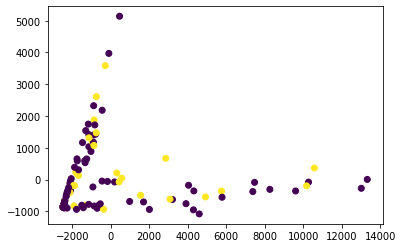

In [190]:
pca = PCA(2)
hranks_2 = pca.fit_transform(diagnosed_height_ranks)
plt.scatter(hranks_2[:,0], hranks_2[:,1], c= labels)

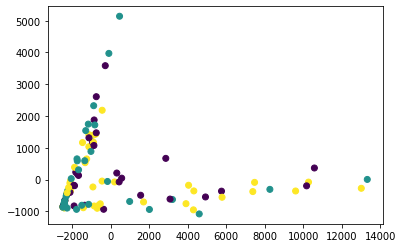

In [191]:
plt.scatter(hranks_2[:,0], hranks_2[:,1], c= labels3)

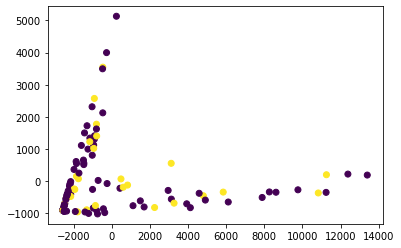

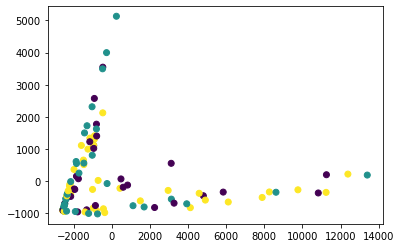

In [193]:
pca = PCA(2)
xranks_2 = pca.fit_transform(diagnosed_x_ranks)
plt.scatter(xranks_2[:,0], xranks_2[:,1], c= labels)
plt.show()
plt.scatter(xranks_2[:,0], xranks_2[:,1], c= labels3)
plt.show()

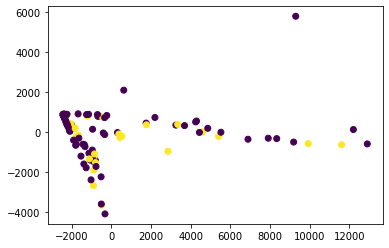

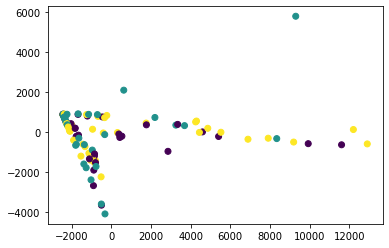

In [194]:
pca = PCA(2)
yranks_2 = pca.fit_transform(diagnosed_y_ranks)
plt.scatter(yranks_2[:,0], yranks_2[:,1], c= labels)
plt.show()
plt.scatter(yranks_2[:,0], yranks_2[:,1], c= labels3)
plt.show()

In [198]:
# define a function for computing the accuracy over 
def cv_svm_accuracy_iter(X, y, n_iter=10, fold=5):
    overall_acc = [1000 for j in range(n_iter)]
    for i in range(n_iter):
        accuracies = [100 for k in range(fold)]
        # fold cv
        str_cv = StratifiedKFold(n_splits=fold, shuffle=True)
        fold_num = 0
        for train_index, test_index in str_cv.split(X, y):
            clf = svm.LinearSVC()
            clf.fit(X[train_index], y[train_index])
            test_pred = clf.predict(X[test_index])
            test_acc = accuracy_score(y[test_index], np.array([round(i) for i in test_pred]))
            accuracies[fold_num] = test_acc
            # update fold
            fold_num +=1
        overall_acc[i] = np.mean(accuracies)
        print(accuracies)
    return overall_acc

cv_svm_accuracy_iter(diagnosed_height_ranks, labels, 10, 5)

/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[0.9130434782608695, 0.782608695652174, 0.6521739130434783, 0.6521739130434783, 0.6956521739130435]


/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[0.8695652173913043, 0.6956521739130435, 0.5652173913043478, 0.782608695652174, 0.5217391304347826]


/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[0.782608695652174, 0.6086956521739131, 0.6956521739130435, 0.6956521739130435, 0.6956521739130435]


/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[0.782608695652174, 0.6956521739130435, 0.6086956521739131, 0.8260869565217391, 0.6086956521739131]


/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[0.782608695652174, 0.7391304347826086, 0.6956521739130435, 0.6956521739130435, 0.6521739130434783]


/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[0.782608695652174, 0.6521739130434783, 0.7391304347826086, 0.6086956521739131, 0.6956521739130435]


/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[0.6521739130434783, 0.5217391304347826, 0.6956521739130435, 0.782608695652174, 0.7391304347826086]


/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[0.6956521739130435, 0.7391304347826086, 0.782608695652174, 0.6086956521739131, 0.6521739130434783]


/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[0.6956521739130435, 0.782608695652174, 0.6956521739130435, 0.6521739130434783, 0.6521739130434783]


/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[0.6521739130434783, 0.7391304347826086, 0.6521739130434783, 0.6956521739130435, 0.6956521739130435]


/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[0.7391304347826086,
 0.6869565217391304,
 0.6956521739130435,
 0.7043478260869566,
 0.7130434782608696,
 0.6956521739130435,
 0.6782608695652174,
 0.6956521739130436,
 0.6956521739130436,
 0.6869565217391305]

In [199]:
cv_svm_accuracy_iter(diagnosed_x_ranks, labels, 10, 5)

/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[0.782608695652174, 0.6086956521739131, 0.6521739130434783, 0.6521739130434783, 0.391304347826087]


/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[0.6956521739130435, 0.6086956521739131, 0.6521739130434783, 0.6956521739130435, 0.6086956521739131]


/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[0.6086956521739131, 0.6956521739130435, 0.5217391304347826, 0.6086956521739131, 0.6521739130434783]


/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[0.6521739130434783, 0.6956521739130435, 0.6086956521739131, 0.6086956521739131, 0.7391304347826086]


/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


KeyboardInterrupt: 

In [ ]:
# try different methods and pca


In [ ]:
# would manually balancing the classes make a difference

In [200]:
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0])

In [203]:
be = 0
mag = 0
new_ind =[]
for i in range(115):
    if labels[i]==0:
        if mag<29:
            mag += 1
            new_ind.append(i)
    if labels[i]==1:
        if be < 29:
            be+=1
            new_ind.append(i)

In [206]:
len(labels[new_ind])

58

In [210]:
cv_knn_accuracy_iter(diagnosed_height_ranks[new_ind,:], labels[new_ind], 10, 5)

[0.5, 0.4166666666666667, 0.4166666666666667, 0.5454545454545454, 0.45454545454545453]
[0.4166666666666667, 0.5833333333333334, 0.6666666666666666, 0.36363636363636365, 0.5454545454545454]
[0.4166666666666667, 0.3333333333333333, 0.5, 0.5454545454545454, 0.5454545454545454]
[0.3333333333333333, 0.25, 0.5833333333333334, 0.6363636363636364, 0.5454545454545454]
[0.75, 0.5, 0.5833333333333334, 0.36363636363636365, 0.45454545454545453]
[0.6666666666666666, 0.5, 0.5833333333333334, 0.45454545454545453, 0.45454545454545453]
[0.5, 0.5833333333333334, 0.3333333333333333, 0.6363636363636364, 0.45454545454545453]
[0.5833333333333334, 0.3333333333333333, 0.3333333333333333, 0.45454545454545453, 0.6363636363636364]
[0.5833333333333334, 0.3333333333333333, 0.4166666666666667, 0.6363636363636364, 0.6363636363636364]
[0.5, 0.3333333333333333, 0.4166666666666667, 0.6363636363636364, 0.45454545454545453]


[0.4666666666666667,
 0.5151515151515151,
 0.46818181818181814,
 0.4696969696969696,
 0.5303030303030304,
 0.5318181818181819,
 0.5015151515151516,
 0.46818181818181814,
 0.5212121212121212,
 0.46818181818181814]

In [208]:
diagnosed_height_ranks.shape

(115, 44100)

In [209]:
labels3.astype('int')[new_ind]

array([3, 2, 3, 2, 3, 3, 3, 3, 3, 3, 2, 1, 3, 3, 1, 2, 3, 3, 2, 1, 1, 3,
       1, 3, 3, 1, 3, 3, 1, 3, 1, 2, 1, 3, 3, 2, 3, 3, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Metastatic Cancer


In [211]:
meta_ind = []
meta_label =[] # 1 for meta
for i in range(115):
    #non-meta
    if labels3[i]==2:
        meta_ind.append(i)
        meta_label.append(0)
        
    if labels3[i]==3:
        meta_ind.append(i)
        meta_label.append(1)


In [213]:
len(meta_ind)

86

In [215]:
sum(meta_label)

45

In [217]:
cv_knn_accuracy_iter(diagnosed_height_ranks[meta_ind,:], np.array(meta_label), 10, 5)

[0.6666666666666666, 0.6470588235294118, 0.4117647058823529, 0.6470588235294118, 0.5294117647058824]
[0.6666666666666666, 0.7647058823529411, 0.5882352941176471, 0.35294117647058826, 0.6470588235294118]
[0.6666666666666666, 0.5882352941176471, 0.6470588235294118, 0.5882352941176471, 0.6470588235294118]
[0.6666666666666666, 0.7647058823529411, 0.7647058823529411, 0.47058823529411764, 0.23529411764705882]
[0.4444444444444444, 0.7647058823529411, 0.5294117647058824, 0.35294117647058826, 0.7058823529411765]
[0.4444444444444444, 0.5882352941176471, 0.5294117647058824, 0.7058823529411765, 0.7058823529411765]
[0.4444444444444444, 0.7058823529411765, 0.6470588235294118, 0.6470588235294118, 0.7647058823529411]
[0.6666666666666666, 0.4117647058823529, 0.7058823529411765, 0.47058823529411764, 0.7058823529411765]
[0.6111111111111112, 0.47058823529411764, 0.6470588235294118, 0.6470588235294118, 0.6470588235294118]
[0.6111111111111112, 0.7058823529411765, 0.47058823529411764, 0.5882352941176471, 0.5

[0.580392156862745,
 0.6039215686274509,
 0.6274509803921569,
 0.580392156862745,
 0.5594771241830065,
 0.5947712418300654,
 0.6418300653594771,
 0.592156862745098,
 0.6045751633986928,
 0.59281045751634]

In [218]:
45/86

0.5232558139534884

In [219]:
cv_svm_accuracy_iter(diagnosed_height_ranks[meta_ind,:], np.array(meta_label), 10, 5)

/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[0.5555555555555556, 0.5294117647058824, 0.5882352941176471, 0.5294117647058824, 0.35294117647058826]


/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[0.5555555555555556, 0.5294117647058824, 0.35294117647058826, 0.4117647058823529, 0.47058823529411764]


/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[0.5, 0.5294117647058824, 0.23529411764705882, 0.47058823529411764, 0.47058823529411764]


/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[0.5, 0.47058823529411764, 0.4117647058823529, 0.4117647058823529, 0.5294117647058824]


/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[0.3888888888888889, 0.5882352941176471, 0.5882352941176471, 0.35294117647058826, 0.5294117647058824]


/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[0.3888888888888889, 0.4117647058823529, 0.6470588235294118, 0.47058823529411764, 0.5882352941176471]


/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[0.5555555555555556, 0.5294117647058824, 0.5294117647058824, 0.5294117647058824, 0.47058823529411764]


/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[0.5, 0.5294117647058824, 0.35294117647058826, 0.5882352941176471, 0.47058823529411764]


/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[0.4444444444444444, 0.35294117647058826, 0.5882352941176471, 0.5294117647058824, 0.5882352941176471]


/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,
/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[0.3888888888888889, 0.47058823529411764, 0.5882352941176471, 0.5882352941176471, 0.47058823529411764]


/home/qw817/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


[0.5111111111111112,
 0.46405228758169936,
 0.44117647058823534,
 0.46470588235294114,
 0.48954248366013076,
 0.5013071895424838,
 0.5228758169934641,
 0.4882352941176471,
 0.5006535947712418,
 0.5013071895424838]

In [ ]:
# metastatic cancer vs primary lung cancer

In [220]:
len(labels)

115

In [196]:
# try with larger bin size
for i in ids:
    print("/home/qw817/rivet/rivet_console /home/qw817/Desktop/Lung_TDA_application/small_point_cloud_height_filtration/h_ptcl_"+i[-4:]+".txt /home/qw817/Desktop/Lung_TDA_application/h_rivet100/h_pc"+i[-4:]+".rivet --xbins 100 --ybins 100")
    

/home/qw817/rivet/rivet_console /home/qw817/Desktop/Lung_TDA_application/small_point_cloud_height_filtration/h_ptcl_0068.txt /home/qw817/Desktop/Lung_TDA_application/h_rivet100/h_pc0068.rivet --xbins 100 --ybins 100
/home/qw817/rivet/rivet_console /home/qw817/Desktop/Lung_TDA_application/small_point_cloud_height_filtration/h_ptcl_0072.txt /home/qw817/Desktop/Lung_TDA_application/h_rivet100/h_pc0072.rivet --xbins 100 --ybins 100
/home/qw817/rivet/rivet_console /home/qw817/Desktop/Lung_TDA_application/small_point_cloud_height_filtration/h_ptcl_0088.txt /home/qw817/Desktop/Lung_TDA_application/h_rivet100/h_pc0088.rivet --xbins 100 --ybins 100
/home/qw817/rivet/rivet_console /home/qw817/Desktop/Lung_TDA_application/small_point_cloud_height_filtration/h_ptcl_0090.txt /home/qw817/Desktop/Lung_TDA_application/h_rivet100/h_pc0090.rivet --xbins 100 --ybins 100
/home/qw817/rivet/rivet_console /home/qw817/Desktop/Lung_TDA_application/small_point_cloud_height_filtration/h_ptcl_0091.txt /home/qw817

In [10]:
from os import listdir
from os.path import isfile, join
mypath='rivet_outputs'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]

In [17]:
ids = [i[5:9] for i in onlyfiles]

In [18]:
# try with larger bin size - h 50 bins
for i in ids:
    print("/home/qw817/rivet/rivet_console /home/qw817/Desktop/Lung_TDA_application/small_point_cloud_height_filtration/h_ptcl_"+i[-4:]+".txt /home/qw817/Desktop/Lung_TDA_application/h_rivet50/h_pc"+i[-4:]+".rivet --xbins 50 --ybins 50")

for i in ids:
    print("/home/qw817/rivet/rivet_console /home/qw817/Desktop/Lung_TDA_application/x_pc/pc_"+i[-4:]+".txt /home/qw817/Desktop/Lung_TDA_application/x_rivet50/x_pc"+i[-4:]+".rivet --xbins 50 --ybins 50")
    
for i in ids:
    print("/home/qw817/rivet/rivet_console /home/qw817/Desktop/Lung_TDA_application/y_pc/pc_"+i[-4:]+".txt /home/qw817/Desktop/Lung_TDA_application/y_rivet50/y_pc"+i[-4:]+".rivet --xbins 50 --ybins 50")
     
for i in ids:
    print("/home/qw817/rivet/rivet_console /home/qw817/Desktop/Lung_TDA_application/small_point_clouds/pc_"+i[-4:]+".txt /home/qw817/Desktop/Lung_TDA_application/deg_rips50_rivet/rivet"+i[-4:]+".rivet --datatype points --homology 0 --xbins 50 --ybins 50")



/home/qw817/rivet/rivet_console /home/qw817/Desktop/Lung_TDA_application/small_point_cloud_height_filtration/h_ptcl_0405.txt /home/qw817/Desktop/Lung_TDA_application/h_rivet50/h_pc0405.rivet --xbins 50 --ybins 50
/home/qw817/rivet/rivet_console /home/qw817/Desktop/Lung_TDA_application/small_point_cloud_height_filtration/h_ptcl_0223.txt /home/qw817/Desktop/Lung_TDA_application/h_rivet50/h_pc0223.rivet --xbins 50 --ybins 50
/home/qw817/rivet/rivet_console /home/qw817/Desktop/Lung_TDA_application/small_point_cloud_height_filtration/h_ptcl_0624.txt /home/qw817/Desktop/Lung_TDA_application/h_rivet50/h_pc0624.rivet --xbins 50 --ybins 50
/home/qw817/rivet/rivet_console /home/qw817/Desktop/Lung_TDA_application/small_point_cloud_height_filtration/h_ptcl_0377.txt /home/qw817/Desktop/Lung_TDA_application/h_rivet50/h_pc0377.rivet --xbins 50 --ybins 50
/home/qw817/rivet/rivet_console /home/qw817/Desktop/Lung_TDA_application/small_point_cloud_height_filtration/h_ptcl_0290.txt /home/qw817/Desktop/Lun

In [ ]:
# convert .rivet files to rank functions for y filtration
h100_ranks = []
for i in ids:
    with open("h_rivet100/h_pc"+i[-4:]+".rivet", 'rb') as f:
        computed_data = f.read()
    current_rank = rank_function(computed_data, grid_size=100, fixed_bounds=None, use_weights=False, normalize=False, minimum_rank=0)
    h100_ranks.append(current_rank)
h100_rank_mat = np.array(h100_ranks)
h100_rank_mat.shape
np.savetxt("computed_rank_functions_y.csv", h100_rank_mat, delimiter=',')